# 第4章 音声認識の初歩─DPマッチング─

In [1]:
# リポジトリを複製する
!git clone https://github.com/dfukagaw28/python_asr.git

Cloning into 'python_asr'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 190 (delta 16), reused 18 (delta 9), pack-reused 165
Receiving objects: 100% (190/190), 725.75 KiB | 10.83 MiB/s, done.
Resolving deltas: 100% (91/91), done.


In [2]:
# Google Drive のデータをマウントする
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Google Drive へのシンボリックリンクを作成する
!ln -sf /content/drive/MyDrive/data/python_asr/ /content/python_asr/data

In [4]:
%ls /content/python_asr/data/

fbank/  label/  mfcc/  original/  wav/


## 第4.1節 音声認識につきまとう，アラインメント問題

In [5]:
%cd /content/python_asr/01compute_features

/content/python_asr/01compute_features


以下の２つの音声ファイルは，いずれも同じ文章を読み上げている

```
また禰寝氏は、中山王の治める、琉球王国との交易にも参加した
```

Sampling Frequency: 48000 [Hz]
Sample Size: 2 [Byte]
Number of Channels: 1
Number of Samples: 259680


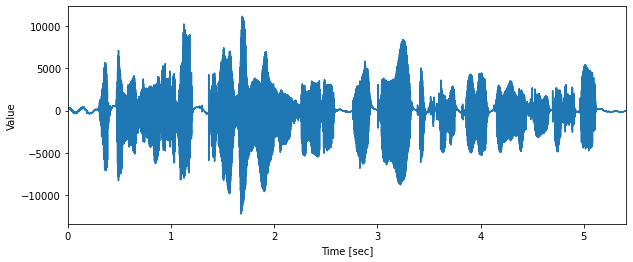

In [6]:
%run plot_wave.py ../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set1_009.wav
from IPython.display import Audio
Audio('../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set1_009.wav')

Sampling Frequency: 48000 [Hz]
Sample Size: 2 [Byte]
Number of Channels: 1
Number of Samples: 292800


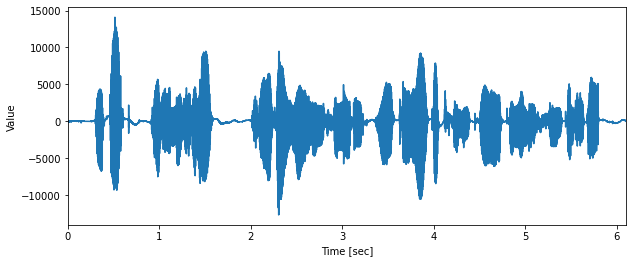

In [7]:
%run plot_wave.py ../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set2_009.wav
from IPython.display import Audio
Audio('../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set2_009.wav')

スペクトログラムを比較する（横軸は一致していない）

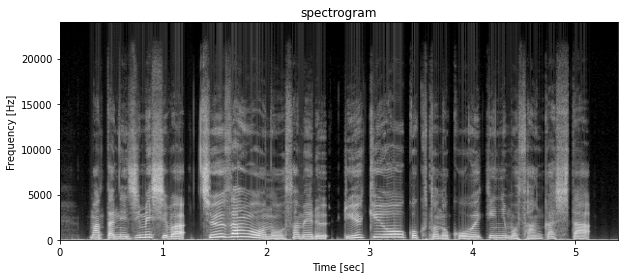

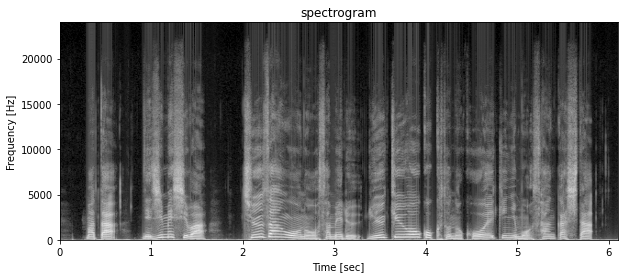

In [17]:
%run test_spectrogram.py --wav_file ../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set1_009.wav --no_wave
%run test_spectrogram.py --wav_file ../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set2_009.wav --no_wave

## 第4.3節 DPマッチングを実装してみよう

In [18]:
%cd /content/python_asr/02dp_matching

/content/python_asr/02dp_matching


### ダウンサンプリング

In [20]:
!apt-get install -qq -y libsox-fmt-all sox
!pip install sox

Selecting previously unselected package libopencore-amrnb0:amd64.
(Reading database ... 155632 files and directories currently installed.)
Preparing to unpack .../00-libopencore-amrnb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrnb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libopencore-amrwb0:amd64.
Preparing to unpack .../01-libopencore-amrwb0_0.1.3-2.1_amd64.deb ...
Unpacking libopencore-amrwb0:amd64 (0.1.3-2.1) ...
Selecting previously unselected package libmagic-mgc.
Preparing to unpack .../02-libmagic-mgc_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic-mgc (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libmagic1:amd64.
Preparing to unpack .../03-libmagic1_1%3a5.32-2ubuntu0.4_amd64.deb ...
Unpacking libmagic1:amd64 (1:5.32-2ubuntu0.4) ...
Selecting previously unselected package libao-common.
Preparing to unpack .../04-libao-common_1.2.2+20180113-1ubuntu1_all.deb ...
Unpacking libao-common (1.2.2+20180113-1ubuntu1) ...
Selecting previou

In [21]:
%run 00_prepare_wav_dp.py

../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set1_001.wav
../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set1_002.wav
../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set1_003.wav
../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set1_004.wav
../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set1_005.wav
../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set1_006.wav
../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set1_007.wav
../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set1_008.wav
../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set1_009.wav
../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set1_010.wav
../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set2_001.wav
../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set2_002.wav
../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set2_003.wav
../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set2_004.wav
../data/original/jsut_ver1.1/repeat500/wav/REPEAT500_set2_005.wav
../data/or

In [33]:
!find wav -type f | wc -l

50


In [27]:
!du -sm wav

10	wav


### MFCC特徴量を抽出する

In [23]:
%run 01_compute_mfcc_dp.py

./wav/REPEAT500_set1_001.wav
./wav/REPEAT500_set1_002.wav
./wav/REPEAT500_set1_003.wav
./wav/REPEAT500_set1_004.wav
./wav/REPEAT500_set1_005.wav
./wav/REPEAT500_set1_006.wav
./wav/REPEAT500_set1_007.wav
./wav/REPEAT500_set1_008.wav
./wav/REPEAT500_set1_009.wav
./wav/REPEAT500_set1_010.wav
./wav/REPEAT500_set2_001.wav
./wav/REPEAT500_set2_002.wav
./wav/REPEAT500_set2_003.wav
./wav/REPEAT500_set2_004.wav
./wav/REPEAT500_set2_005.wav
./wav/REPEAT500_set2_006.wav
./wav/REPEAT500_set2_007.wav
./wav/REPEAT500_set2_008.wav
./wav/REPEAT500_set2_009.wav
./wav/REPEAT500_set2_010.wav
./wav/REPEAT500_set3_001.wav
./wav/REPEAT500_set3_002.wav
./wav/REPEAT500_set3_003.wav
./wav/REPEAT500_set3_004.wav
./wav/REPEAT500_set3_005.wav
./wav/REPEAT500_set3_006.wav
./wav/REPEAT500_set3_007.wav
./wav/REPEAT500_set3_008.wav
./wav/REPEAT500_set3_009.wav
./wav/REPEAT500_set3_010.wav
./wav/REPEAT500_set4_001.wav
./wav/REPEAT500_set4_002.wav
./wav/REPEAT500_set4_003.wav
./wav/REPEAT500_set4_004.wav
./wav/REPEAT50

In [34]:
!find mfcc -type f | wc -l

50


In [35]:
!du -sm mfcc

2	mfcc


### DPマッチングを実行する

In [25]:
%run 02_dp_matching.py

size of feature_1: 539 x 13
size of feature_2: 608 x 13


In [37]:
!wc alignment.txt

 934 1868 7091 alignment.txt


In [40]:
!head -n 5 alignment.txt && echo : && tail -n 5 alignment.txt

0 0
1 0
2 0
3 0
4 0
:
535 606
536 606
537 606
538 606
538 607


In [41]:
%run 03_dtw_spectrogram.py

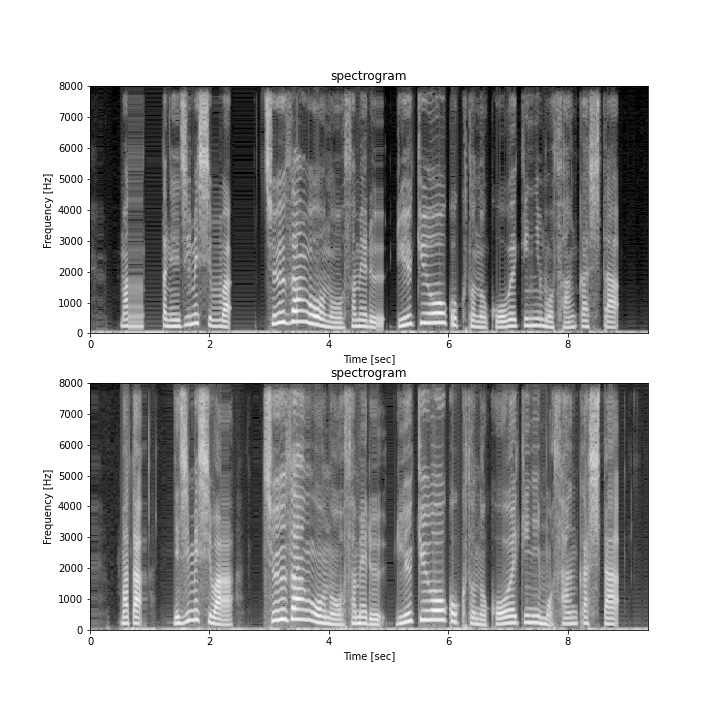

In [42]:
from IPython.display import Image,display_png
display_png(Image('dtw_spectrogram.png'))

### DPマッチングによる発話認識

In [43]:
%run 04_dp_matching_knn.py

./mfcc/REPEAT500_set2_001.bin
./mfcc/REPEAT500_set2_002.bin
./mfcc/REPEAT500_set2_003.bin
./mfcc/REPEAT500_set2_004.bin
./mfcc/REPEAT500_set2_005.bin
./mfcc/REPEAT500_set2_006.bin
./mfcc/REPEAT500_set2_007.bin
./mfcc/REPEAT500_set2_008.bin
./mfcc/REPEAT500_set2_009.bin
./mfcc/REPEAT500_set2_010.bin
./mfcc/REPEAT500_set3_001.bin
./mfcc/REPEAT500_set3_002.bin
./mfcc/REPEAT500_set3_003.bin
./mfcc/REPEAT500_set3_004.bin
./mfcc/REPEAT500_set3_005.bin
./mfcc/REPEAT500_set3_006.bin
./mfcc/REPEAT500_set3_007.bin
./mfcc/REPEAT500_set3_008.bin
./mfcc/REPEAT500_set3_009.bin
./mfcc/REPEAT500_set3_010.bin
./mfcc/REPEAT500_set4_001.bin
./mfcc/REPEAT500_set4_002.bin
./mfcc/REPEAT500_set4_003.bin
./mfcc/REPEAT500_set4_004.bin
./mfcc/REPEAT500_set4_005.bin
./mfcc/REPEAT500_set4_006.bin
./mfcc/REPEAT500_set4_007.bin
./mfcc/REPEAT500_set4_008.bin
./mfcc/REPEAT500_set4_009.bin
./mfcc/REPEAT500_set4_010.bin
./mfcc/REPEAT500_set5_001.bin
./mfcc/REPEAT500_set5_002.bin
./mfcc/REPEAT500_set5_003.bin
./mfcc/REP